<a href="https://colab.research.google.com/github/anushka0005/Tesla_Stock_Prediction/blob/main/Tesla_stock_prediction_using_ARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time-Series Forecasting: Predicting Stock Prices Using An ARIMA Model

Importing the data

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-1-830c3a369e7a>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Loading Data = TSLA.csv

In [ ]:
df = pd.read_csv("/content/TSLA.csv")  #TSLA.csv is in Downloads in D
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-29,22.656668,23.389999,22.552000,23.302000,23.302000,71206500
1,2018-01-30,23.009333,23.218000,22.811333,23.054667,23.054667,70765500
2,2018-01-31,23.167334,23.746000,23.012667,23.620667,23.620667,93211500
3,2018-02-01,23.400000,23.977333,23.242001,23.283333,23.283333,62965500
4,2018-02-02,23.229334,23.463333,22.700666,22.916668,22.916668,55572000


Before building the ARIMA model, let’s see if there is some cross-correlation in out data.

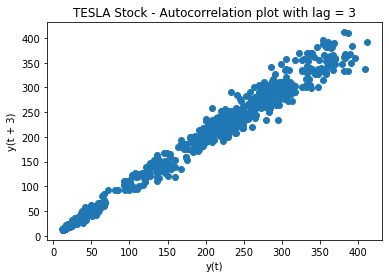

In [ ]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).

Finally, let’s plot the stock price evolution over time.

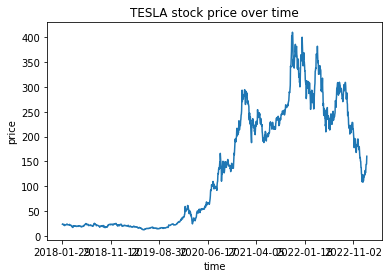

In [ ]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

Next, let’s divide the data into a training (70 % ) and test (30%) set. For this tutorial we select the following ARIMA parameters: p=4, d=1 and q=0.

* p is the number of lag observations.
* d is the degree of differencing.
* q is the size/width of the moving average window.



In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error is 119.4502930481635


Summary of the code


* We split the training dataset into train and test sets and we use the train set to fit the model, and generate a prediction for each element on the test set.
* A rolling forecasting procedure is required given the dependence on observations in prior time steps for differencing and the AR model. To this end, we re-create the ARIMA model after each new observation is received.
* Finally, we manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended at each iteration.

The MSE of the test set is quite large denoting that the precise prediction is a hard problem. However, this is the average squared value across all the test set predictions. Let’s visualize the predictions to understand the performance of the model more.

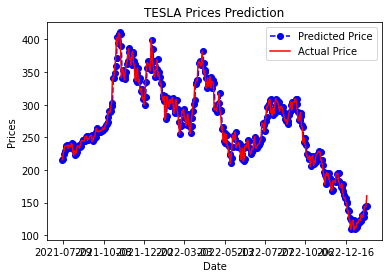

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()

Our ARIMA model results in appreciable results. This model offers a good prediction accuracy and to be relatively fast compared to other alternatives, in terms of training/fitting time and complexity.